## Practical task 2 - *Metric classifiers*

Kolos Maria BSE141

In [1]:
import numpy as np

## Curse of dimensionality

In [2]:
l=100
data=[[] for i in range(200)]

for i in range(200):
    data[i]=[[[] for x in range(i+1)] for y in range(l)]
    for k in range(l):
        data[i][k]=np.random.uniform(-1,1,i+1)


In [3]:
from scipy.spatial.distance import cdist

In [4]:
import scipy as sp
def min_max_dist(dataset,point):
    dist=cdist(dataset,point)[:,0].tolist()
    nrst=dist.index(min(dist))
    frst=dist.index(max(dist))
    return [min(dist),max(dist)]

In [5]:
a = [[0],[1],[0],[0],
              [1],
              [1],
               [1],
               [ 1]]
b = [[0.4]]
min_max_dist(a,b)

[0.4, 0.6]

In [6]:
dist_data=[]
for i in range(200):
    mins=[]
    maxs=[]
    for j in range(100):
        sample=[]
        for k in range(100):
            if(k!=j):
                sample.append(data[i][k])
        res=(min_max_dist(sample,[data[i][j]]))
        mins.append(res[0])
        maxs.append(res[1])
    dist_data.append([np.mean(mins),np.mean(maxs)])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
X=range(1,201)

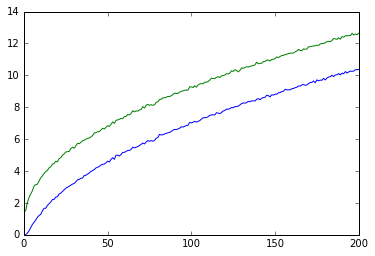

In [9]:
plt.plot(X,dist_data)

In [10]:
ratio=[mx/mn for mn,mx in dist_data]

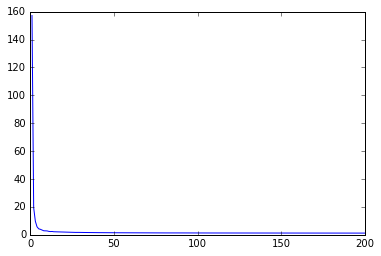

In [11]:
plt.plot(X,ratio)

The curse of dimensionality  does take place here. Let us consider a one-dimentinal case with a fixed point X and a set of 10. They will all fit in a hypersphere of radius R. But as the number of dimentions grows the size of R increases too. So minimum and maximum distance grow as it is shown on the first graph. Hyperbolic ratio is an evidence to minimum distance's logarythmic asymptotics - it starts from nealy zero which makes the ratio goes high and then increases smoothly. 

## Visualization of the decision surface

In [12]:
mean1 = (3,3)
mean2 = (1,1)
cov = [[1, 0], [0, 1]]
s1 = np.random.multivariate_normal(mean1, cov, 100)
s2 = np.random.multivariate_normal(mean2, cov, 100)

In [13]:
import pylab as pl

In [14]:
x1=[]
x2=[]
y1=[]
y2=[]
for i in range (100):
    x1.append(s1[i][0])
    y1.append(s1[i][1])
    x2.append(s2[i][0])
    y2.append(s2[i][1])

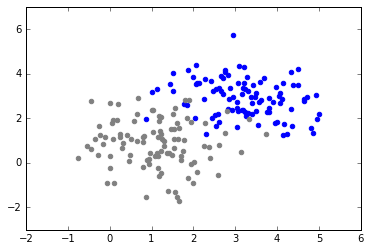

In [15]:
pl.scatter(x1,y1,color='blue')
pl.scatter(x2,y2,color='gray')
pl.show()

In [16]:
ux=[i for i in s1]+[j for j in s2]
uy=[0 for i in s1]+[1 for j in s2]

In [17]:
from random import shuffle
# Given list1 and list2
sh_x = []
sh_y = []
index_shuf = [i for i in range(len(uy))]
shuffle(index_shuf)
for i in index_shuf:
    sh_x.append(ux[i])
    sh_y.append(uy[i])

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier()
knn.fit(sh_x,sh_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
import pandas as pd
from matplotlib import colors as c

In [21]:
X=pd.DataFrame(sh_x)

In [22]:
def plot_surface(X,Y,clf): 
    h = .02
    x_min, x_max = X[0].min(), X[0].max()
    y_min, y_max = X[1].min(), X[1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure(1, figsize=(6,6))
    pl.set_cmap(pl.cm.Paired)
    cMap = c.ListedColormap(['w','c'])
    pl.pcolormesh(xx, yy, Z,cmap=cMap)
    
    # Plot also the training points
    pl.scatter(X[0], X[1],c=sh_y)
    pl.xlabel('Sepal length')
    pl.ylabel('Sepal width')
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.xticks(())
    pl.yticks(())
    pl.show()

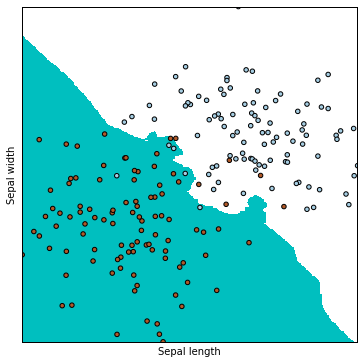

In [23]:
plot_surface(X,sh_y,knn)

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(sh_x,sh_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

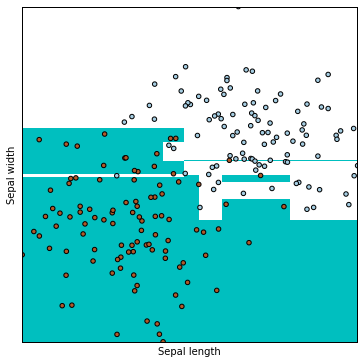

In [25]:
plot_surface(X,sh_y,dtc)

KNN: In 1 NN case each object near a one from different class is bounded by the line orthogonal to the line connecting these two objects. In our case we took default N value which is 5, so the bounderies got smoother since more neighbors affect the result. 
Decision tree: each intermediate node in the tree divides the given set of objects into two separate branches and each terminal node draws the final boundary (which we can see on the plot). The complexity of the surface structure depends on the depth of tree, although too deep trees tend to overfit while too simple trees underfit.

## kNN and decision tree comparison

In [26]:
df=pd.read_csv('adult_data_small.csv')

In [27]:
X1=df.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary'],axis=1)
X1.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,32,205019,12,0,0,50
1,1,40,121772,11,0,0,40
2,2,34,245487,4,0,0,45
3,3,25,176756,9,0,0,35
4,4,32,186824,9,0,0,40


In [28]:
X2=pd.get_dummies(df.drop(['salary'],axis=1),columns=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])

In [29]:
X2.head()


,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,32,205019,12,0,0,50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,40,121772,11,0,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,34,245487,4,0,0,45,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,25,176756,9,0,0,35,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,32,186824,9,0,0,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
YY=df.salary=='>50K'

In [31]:
from sklearn.cross_validation import train_test_split

C:\Users\Marya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
xx1_train,xx1_test,xx2_train,xx2_test,yy_train,yy_test=train_test_split(X1,X2,YY,test_size=0.3)


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
xx1_train_scaled=scaler.fit_transform(xx1_train)
xx1_test_scaled=scaler.fit_transform(xx1_test)

xx2_train_scaled=scaler.fit_transform(xx2_train)
xx2_test_scaled=scaler.fit_transform(xx2_test)

### KNN classification 

In [35]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [1,3,5,7,9,11]}
knn=KNeighborsClassifier()
best_knn = GridSearchCV(knn,params)

In [36]:
from sklearn.metrics import roc_auc_score

1) Scaled numeric

In [37]:
best_knn.fit(xx1_train_scaled,yy_train)
best_knn.score(xx1_test_scaled,yy_test)

0.81533333333333335

2) Scaled full dataset binarized

In [38]:
best_knn.fit(xx2_train_scaled,yy_train)
best_knn.score(xx2_test_scaled,yy_test)

0.83133333333333337

3) Not scaled numeric

In [39]:
best_knn.fit(xx1_train,yy_train)
best_knn.score(xx1_test,yy_test)

0.78866666666666663

4) Not scaled full dataset binarized

In [40]:
best_knn.fit(xx2_train,yy_train)
best_knn.score(xx2_test,yy_test)

0.78866666666666663

### Decision tree classification

In [41]:
params = {'min_samples_leaf': [1,5,10],
         'max_depth': [2, 5, 10]}
dtc=DecisionTreeClassifier()
best_dtc = GridSearchCV(dtc,params)

1) Scaled numeric

In [42]:
best_dtc.fit(xx1_train_scaled,yy_train)
best_dtc.score(xx1_test_scaled,yy_test)

0.82133333333333336

2) Scaled full dataset binarized

In [43]:
best_dtc.fit(xx2_train_scaled,yy_train)
best_dtc.score(xx2_test_scaled,yy_test)

0.84366666666666668

3) Not scaled numeric

In [44]:
best_dtc.fit(xx1_train,yy_train)
best_dtc.score(xx1_test,yy_test)

0.83733333333333337

4) Not scaled full dataset binarized

In [45]:
best_dtc.fit(xx2_train,yy_train)
best_dtc.score(xx2_test,yy_test)

0.84699999999999998

### Summary

- DecisionTreeClassifier is the best for given problem since it provides the most optimal way of splitting data.
- Standardization is used to avoid feauture domination. Greater ones might overshadow the minor ones so the classification will loose in accuracy. So classification tends to be more accurate on the smoothed data.
- DecisionTreeClassifier is more preferable for categorical classification since it defines optimal treshold value to split the dataset. It also doesn't require data scaling because it measures entropy on each feature separately (even though scaled data  result on the tree (0.844) is lower than non-scaled one (0.847)). Using categorical features without standardization isn’t a good choice for kNN-classifier since it might be challenging to find the appropriate distance function